# Data Analysis

### Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Files

In [59]:
data = pd.read_csv("QVI_transaction_data.csv")
data2 = pd.read_csv("QVI_purchase_behaviour.csv")

### Analysing Data 

In [60]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [61]:
data2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [62]:
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


### Megring the Data

In [63]:
df = pd.merge(left=data, right=data2, how='inner', left_on='LYLTY_CARD_NBR', right_on='LYLTY_CARD_NBR')

In [64]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


### Ploting the Data

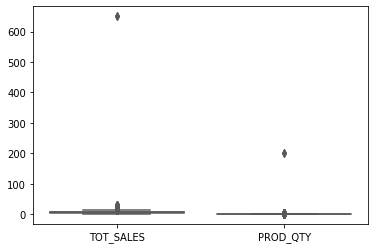

In [65]:
ax = sns.boxplot(data=df[['TOT_SALES','PROD_QTY']], palette="Set2")

### Trying to Eleminate the Outliers, If there is only one

In [66]:
print(df_1['TOT_SALES'].max())
print(df_1['PROD_QTY'].max())

650.0
200


In [67]:
df = df[df.TOT_SALES != 650]
df = df[df.PROD_QTY != 200]

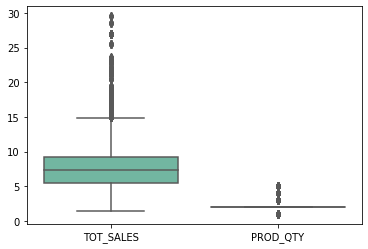

In [68]:
ax = sns.boxplot(data=df[['TOT_SALES','PROD_QTY']], palette="Set2")

### Elemeniting Outliers

In [78]:
df = df[df.TOT_SALES <= 8]

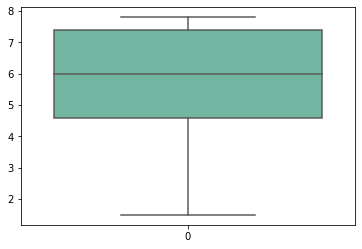

In [79]:
ax = sns.boxplot(data=df['TOT_SALES'], palette="Set2")

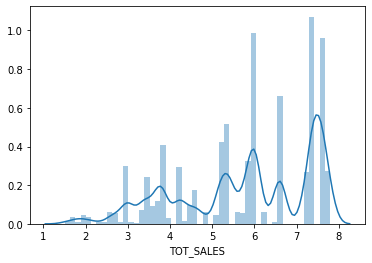

In [80]:
sns.distplot(df['TOT_SALES'], kde = True)

### Cheking for Attribute Types

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166902 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              166902 non-null  int64  
 1   STORE_NBR         166902 non-null  int64  
 2   LYLTY_CARD_NBR    166902 non-null  int64  
 3   TXN_ID            166902 non-null  int64  
 4   PROD_NBR          166902 non-null  int64  
 5   PROD_NAME         166902 non-null  object 
 6   PROD_QTY          166902 non-null  int64  
 7   TOT_SALES         166902 non-null  float64
 8   LIFESTAGE         166902 non-null  object 
 9   PREMIUM_CUSTOMER  166902 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 19.0+ MB
